# Mini projet

## Mise en place de l'espace de travail
Pour réaliser le projet nous utilisons la plateforme JupyterHub fournie par les enseignants.

Pour collaborer, nous utilisons un dépot git hébergé sur github.

Pour la gestion de projet nous utilisons Trello

## Recherche documentaire

- Modélisation stochastique macroscopique d'ordre supérieur du trafic sur les réseaux routiers : implications managériales.
Article intéressant et assez poussé. Il cite beaucoup de références et peut êre un point de départ pour trouver d'autres articles intéressants. Mais pas de représentation graphique
https://rfgi.fr/rfgi/article/view/1156

- Article de journal pour expliquer la formation des bouchons. Pas mal pour la partie vulgarisation
https://theconversation.com/comment-se-forment-les-embouteillages-163994

- Pareil, vulgarisation :
https://www.youtube.com/watch?v=wHz6S2dbYb4

- Un repo sympa a aller voir. Il utilise pygame pour la représentation
https://github.com/alokin-fr/road-traffic-simulation

- Un article chouette pour la modélisation et la représentation (le site est un peu chelou mais l'article vaut le coup)
https://ichi.pro/fr/simulation-du-flux-de-trafic-en-python-261815490433551

- https://www.youtube.com/watch?v=4DRGo3NUM_k

    **Éléments clefs de la vidéo (modélisation mathématique)**:
    
    Workflow du problème : Définition du problème $\to$ Choix des variables $\to$ Hypothèses sous-jacentes $\to$ Construction du modèle $\to$ Évaluation du modèle
    
    Exemple trivial pour commencer : la route droite, avec des voitures en file indienne, si la voiture de devant ralentit, les voitures de derrière vont aussi ralentir, cet effet peut se démultiplier. 
    
    Le conducteur a essentiellement le contrôle sur son ralentissement/accélération (variables), celles-ci sont influencées par : 
    - La distance entre les deux voitures
    - La vitesse relative 
    - On peut penser à encore plus de variables : obstacles imminents, état émotionnel/physique du conducteur, présence de radars, état de la route etc.
    
    **Le choix des variables est un reflet de la visée de notre modèle i.e. ce qu'on cherche à mettre en évidence**.
    
    Hypothèses possibles : 
    - Les voitures ont la même masse $m$ et longueur $L$
    - Une seule voie (pas de doublement)
    - La position des voitures est l'avant du véhicule, dénotée par $x_i(t)$
    - A priori, on ne veut pas d'accident, donc on impose : $$ x_i(t)<x_{i-1}(t) + L$$
    
    Modèle : 
    - Avec nos deux variables, on peut supposer que plus la vitesse relative est grande, plus la force de freinage sera importante. De la même manière, plus la distance relative sera petite, plus la force de freinage sera importante. On peut donc supposer en premier lieu qu'on a la relation suivante : $$ m \cdot x''_{i}(t) = c\frac{x'_{i}(t)-x'_{i-1}(t)}{\left|x_{i}(t)-x_{i-1}(t)\right|}$$
    Comme l'humain ne réagit pas instantanément, on peut corriger la première approximation grossière en rajoutant un temps de réaction $\tau$ : $$ m \cdot x''_{i}(t+\tau) = c\frac{x'_{i}(t)-x'_{i-1}(t)}{\left|x_{i}(t)-x_{i-1}(t)\right|}$$ 
    On peut supposer que le temps de réaction $\tau$ est le même pour tous les conducteurs (nouvelle hypothèse).
    
        En intégrant une première fois : $$v_{i}(t+\tau) = C\ln(\left| x_{i}(t)-x_{i-1}(t)\right|)+D_i$$
        
    Avec notre modèle, on cherche à optimiser le trafic, c'est-à-dire atteindre un équilibre, on pourrait le définir comme les conditions suivantes : 
    - Les voitures ont la même vitesse $v$
    - La distance entre les voitures est $d$
    
    On pourra alors parler de densité $\rho$ et on pourra étudier la vitesse des voitures en fonction de $\rho$ par exemple.
    
    On pourra par ailleurs étudier les petites variations des positions $x_{i}(t)$ autour de leurs positions d'équilibre et les répercussions sur le trafic. Il faudra donc bien modéliser la *première* voiture qui est à l'origine de la perturbation. Un modèle possible parmi tant d'autres serait : 
    - La voiture commence avec la vitesse d'équilibre
    - Elle freine légèrement entre $t=0$ et $t=t_1$
    - Elle revient à sa vitesse d'équilibre après
    - Sa vitesse est donnée par $$ x'_{1}(t) = \left\{ \begin{array}{cl}
v &, & \ t \leq 0 \\
v(1-kt\exp(\frac{t_1-t}{t_1})) &, & \ t > 0
\end{array} \right.$$

    Cela nous permettra d'étudier la perturbation sur chaque voiture dans le temps.

- https://www.youtube.com/watch?v=YbERBok9s0I et https://www.youtube.com/watch?v=tDMMyNQZuF8

    Cours très intéressants sur la typologie des modèles mathématiques d'étude du trafic de voiture, ils rentrent dans les détails croustillants (EDP, conditions aux bords, algorithme de résolution etc.)
    
    **Éléments clefs de la vidéo** :
    
    On distingue 4 grandes famille de modèles de traffic : microscopique, macroscopique, mésoscopique, stochastique. On s'intéresse ici au modèle macroscopique.
    Il s'agit ici de voir ce modèle de traffic comme l'étude d'un fluide. 
    
    Hypothèses globales possibles :
    - Les conducteurs respectent les règles du code
    - La longueur des voitures est la même, on a une approche macroscopique, c'est une hypothèse raisonnable.
    
    Observation liminaire : 
    - Lorsqu'on regarde le traffic de très loin, le déplacement macroscopique des véhicules s'apparente à l'écoulement d'un fluide. On peut supposer que le mouvement macroscopique des véhicules ressemble à l'écoulement d'un fluide compressible à une dimension.
    
    Hypothèses spécifiques au modèle macroscopique :
    - Le flux du traffic est conservé (équation de continuité) : aucune voiture n'est créée de nulle part ni détruite.
    - Il existe une relation bijective entre vitesse et densité, ainsi qu'entre flux et densité.
    - On suppose que le nombre de voitures est assez grand pour que la densité moyenne et le flux moyen soient des fonctions de classe $\mathcal{C^1}$ d'espace et de temps.
    
    Définition des variables :
    - Densité : $\overrightarrow{\rho}(x,t)$ : nombre de voitures par unité de longueur à un instant $t$
    - Densité de flux : $\overrightarrow{j}$ : nombre de voitures dépassant un point donné par unité de temps.
    - Vitesse : $\overrightarrow{v}(x,t)$
    - On a : $\overrightarrow{j} = \rho \cdot \overrightarrow{v}$
    
    Modèle :
    On rappelle l'équation de continuité : $$\frac{\partial \rho}{\partial t} +\overrightarrow{\nabla}\cdot \overrightarrow{j}=0 \quad ,$$
    avec $\overrightarrow{\nabla}\cdot$ l'opérateur divergence.
    
    A une dimension, cela se ramène à : $$\frac{\partial \rho}{\partial t} + \frac{\partial j}{\partial x} =0$$

    On a besoin d'une condition initiale : la densité initiale, à $t=0$, $$\rho(x,0)=\rho_0$$ 
    
    Par ailleurs, cette EDP d'ordre 1 est résolvable, si $v = v(\rho)$, on aura alors deux équations exploitables.
    
    On peut résoudre analytiquement (courbes caractéristiques) ou numériquement.
    
    Examinons les propriétés que devrait satisfaire la relation vitesse et densité:
    - $\frac{\mathrm{d}v}{\mathrm{d}\rho}<0$ : $v$ devrait être une fonction décroissante de la densité.
    - $v=v_{max}$ lorsque $\rho =0$
    - $v=0$ lorsque $\rho = \rho_{max}$
    
    - **Modèle de Greenshield** : une première approche pourrait être de supposer qu'il existe une relation linéaire entre $v$ et $\rho$ telle que : $$v = v_{max}(1-\frac{\rho}{\rho_{max}})$$
    On vérifie aisément que les trois conditions sur la relation entre vitesse et densité sont vérifiées.
    On a par ailleurs : 
    $$j = v_{max}(\rho - \frac{\rho^2}{\rho_{max}})$$
    On pourra faire un graphique de $v$ en fonction de $\rho$,et également de $j$ en fonction de $\rho$.
    On vérifie aisément que le maximum de $j$ est atteint en $\rho = \frac{\rho_{max}}{2}$ et vaut $j_{max} = \frac{v_{max}\rho_{max}}{4}$.
    - **Modèle de Greenberg** : $$v = v_{max}\log(\frac{\rho_{max}}{\rho}) \quad ,$$ on a bien les trois conditions qui sont vérifiées.
    On a par ailleurs : 
    $$j = v_{max}\rho\log(\frac{\rho_{max}}{\rho}) $$
    - **Modèle de Underwood** : $$v = v_{max}\exp(-\frac{\rho}{\rho_{max}})$$
    On a : 
    $$j = v_{max}\rho\exp(-\frac{\rho}{\rho_{max}}) $$
    - **Modèle de Pipes et Munjal** : $$v = v_{max}\big(1-(\frac{\rho}{\rho_{max}})^n \big) \quad , \quad n \gt 1$$
    On a : 
    $$j = v_{max}\rho\big(1-(\frac{\rho}{\rho_{max}})^n \big)$$        

Concentrons-nous sur un modèle : celui de Lighthill, Whitham et Richards.

On part de l'équation de continuité avec les hypothèses qui vont bien : 
$$\frac{\partial \rho}{\partial t} + \frac{\partial j}{\partial x} =0$$

On a par ailleurs une relation : 
$$ v = v(\rho) $$

Des conditions initiales et aux limites :

$$\left\{ \begin{array}{cl}
\rho(x,0) & = \ \rho_0(x) \\
\rho(0,t) & = \ \alpha \\
\rho(L,t) & = \ \beta
\end{array} \right.$$

Commençons la résolution de notre problème : 

On cherche d'abord à discrétiser la route, *i.e.* notre abcisse $(Ox)$ donnée par l'intervalle $[0,l]$, où $l$ est la longueur de la route. 
On a donc : 

$$x(i+1) = x(i) + \mathrm{d}x \quad , \quad i \in [\![1,n-1]\!]$$

où : $\mathrm{d}x = \frac{l}{n-1}$

De la même manière : 

$$t(j+1) = t(j) + \mathrm{d}t $$

où $\mathrm{d}t = \frac{T}{m-1}$, avec $T$ : la durée considérée divisée en m-1 intervalles

De l'équation de continuité, on tire : 

$$\frac{\partial\rho}{\partial t} + \frac{\partial \rho}{\partial x} \cdot v + \frac{\partial v}{\partial x} \cdot \rho = 0$$

On utilise une méthode des différences finies, "forward in time, backward in space", par définition : 

$$ \frac{\partial \rho}{\partial t} = \lim_{\mathrm{d}t \to 0} \frac{\rho(x,t+\mathrm{d}t)-\rho(x,t)}{\mathrm{d}t} \simeq \frac{\rho(x,t+\mathrm{d}t)-\rho(x,t)}{\mathrm{d}t}$$

On choisit pour les deux autres termes :

$$ 
\left\{ \begin{array}{cl}
\frac{\partial \rho}{\partial x} & \simeq \ \frac{\rho(x,t)-\rho(x-\mathrm{d}x,t)}{\mathrm{d}x} \\
\frac{\partial v}{\partial x} & \simeq \ \frac{v(x,t)-v(x-\mathrm{d}x,t)}{\mathrm{d}x}
\end{array} \right.
$$

Ce qui donne pour notre modèle discret : 

$$ 
\left\{ \begin{array}{cl}
\frac{\partial \rho}{\partial t} & \simeq \ \frac{\rho(i,j+1)-\rho(i,j)}{\mathrm{d}t} \\
\frac{\partial \rho}{\partial x} & \simeq \ \frac{\rho(i,j)-\rho(i-1,j)}{\mathrm{d}x} \\
\frac{\partial v}{\partial x} & \simeq \ \frac{v(i,j)-v(i-1,j)}{\mathrm{d}x}
\end{array} \right.
$$

En réarrangant l'équation de continuité, on obtient l'évolution de la densité en $i$ au temps $j+1$ :

$$
\rho(i,j+1)= \rho(i,j) - \frac{\mathrm{d}t}{\mathrm{d}x}\big[v(i,j)\big(\rho(i,j)-\rho(i-1,j)\big) + \rho(i,j)\big(v(i,j)-v(i-1,j)\big)\big]
$$

## Modèle

On s'intéresse à la modélisation d'une portion de route droite à une seule voie. On souhaite faire évoluer continuellement des voitures sur cette route.

Je représente chaque voiture de manière discrète par sa position, sa longueur et sa vitesse.

La modélisation repose fortement sur le comportement de l'automobiliste. L'automobiliste se comporte comme un automate déterministe qui connaît la distance avec une ou plusieurs voitures autor de lui et la vitesse relative. Cet automate interragit avec la voiture seulement en freinant ou en accélérant. On se donne un cadre de modélisation général qui prends en compte plusieurs critères du comportement d'un automobiliste :
- La vitesse de réaction qui se traduit par un délai entre l'évènement induisant une réaction et l'application de l'action par l'automobiliste
- L'accélération maximale / La force maximale de freinage
- La vitesse maximale
- Le temps minimal avec les voitures précédentes

Comme l'accélération maximale et la force maximale de freinage sont finies, la vitesse est une fonction continue.

On va chercher au préalable d'étudier l'impact des différents paramètres de modélisation sur le comportement de l'automobiliste.

## Modélisation préalable

Dans un premier temps je m'intéresse à la représentation possible d'une voiture sur une route circulaire. Je choisis une route circulaire de taille 1km, et une voiture se déplaçant à 30 km.h-1. La voiture tourne dans le sens direct et j'identifie sa position à l'instant t par la distance parcourue depuis le temps t=0.

On a donc $d = v * t$

Je crée une fonction qui permet d'obtenir la distance parcourue, la vitesse et l'accélération (tangentielle) de la voiture à des instants donnés.

In [64]:
import numpy as np

_maxSpeed = 30 / 3.6  # m.s-1
_trackLen = 1000    # m

def getCarKinematics(l_t):
    '''Donne la position de la voiture à partir d'une liste d'instants (en secondes)'''
    retVal = np.empty((3, len(l_t)))
    # Position
    retVal[0, :] = np.mod(_maxSpeed * l_t, _trackLen)
    # Vitesse
    retVal[1, :] = np.ones(len(l_t)) * _maxSpeed
    # Accel
    retVal[2, :] = 0
    return retVal

A partir de ces donnés je peux tracer la position de la voiture en fonction du temps, sa vitesse et son accélération. Je vais avoir besoin de régulièrement afficher ces graphes alors je crée une fonction à cet effet.

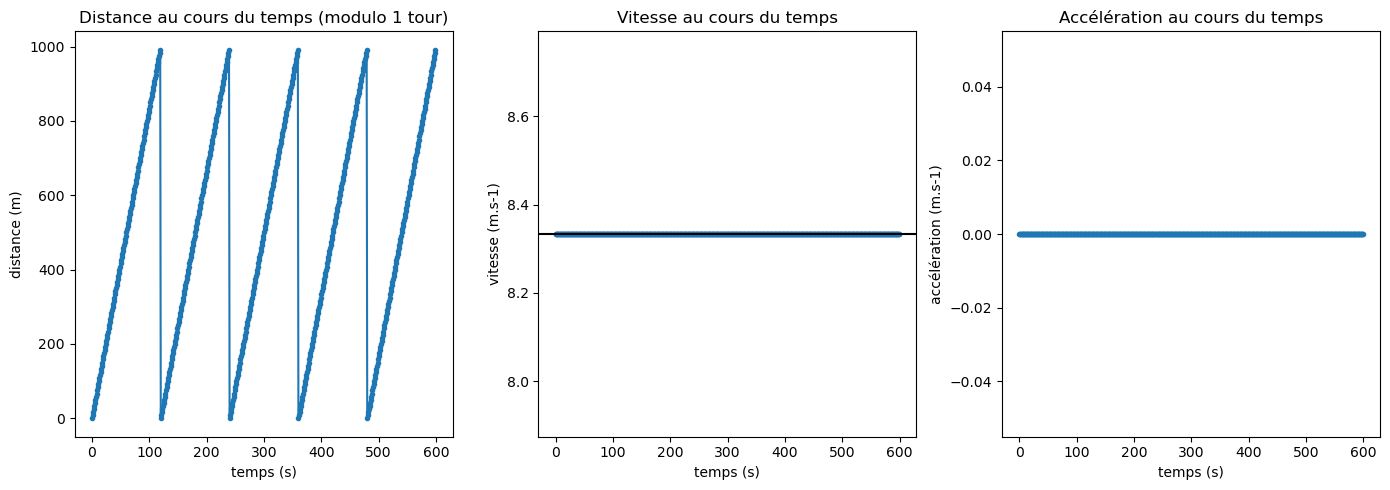

In [65]:
np_times = np.arange(0, 60*10, 1) # en secondes
np_carKinematics = getCarKinematics(np_times)

import matplotlib.pyplot as plt

def showCarKinematics(np_carKinematics):
    # configuration de la grille de plots
    fig, axs = plt.subplots(1, 3, figsize=(14, 5)) 
    
    axs[0].plot(np_times, np_carKinematics[0, :], '.-')
    axs[0].set_title('Distance au cours du temps (modulo 1 tour)')
    axs[0].set_xlabel('temps (s)')
    axs[0].set_ylabel('distance (m)')
    
    axs[1].plot(np_times, np_carKinematics[1, :], '.-')
    axs[1].set_title('Vitesse au cours du temps')
    axs[1].set_xlabel('temps (s)')
    axs[1].set_ylabel('vitesse (m.s-1)')
    axs[1].axhline(_maxSpeed, color='black')
    
    axs[2].plot(np_times, np_carKinematics[2, :], '.-')
    axs[2].set_title('Accélération au cours du temps')
    axs[2].set_xlabel('temps (s)')
    axs[2].set_ylabel('accélération (m.s-1)')
    
    plt.tight_layout(w_pad=1, h_pad=1)
    plt.show()

showCarKinematics(np_carKinematics)

Je cherche maintenant à faire évoluer le comportement de la voiture. Je souhaite que la voiture accélère avec une accélération constante jusqu'à une vitesse maximale de 30 km.h-1 puis qu'elle stabilise sa vitesse.

A cet effet, nous allons faire une simulation instants par instants. A $t=0$ on a la voiture qui est immobile à la position 0. Ensuite, le conducteur va appliquer pendant un intervalle donné une accélération à la voiture. Accélération choisie en fonction de sa vitesse et de sa position actuelle. Cette accélération est limitée par les caractéristiques de la voiture à savoir :
- L'accélération maximale
- Le freinage maximal
- Le seuil d'accélération applicable par le conducteur
- La force de freinage minimale appliquée par le conducteur (en dessous de cette force, le conducteur laisse la voiture avancer)

Comme l'accélération est appliquée pour toute la durée de l'intervalle de temps, on trouve la vitesse en intégrant par la méthode des rectangles à droite. La distance est elle intégrée avec la méthode des trapèzes.

Pour cette modélisation préalable, on considère que le conducteur va accélérer au maximum des capacités de la voiture sans pour autant dépasser la vitesse limite. Il cherche alors à atteindre la vitesse max en un intervalle de temps. Ce qui équivaut à résoudre l'équation suivante :
$$
V_max = V + a\Delta t
$$
$$
\Leftrightarrow a = \frac{V_max - V}{\Delta t}
$$

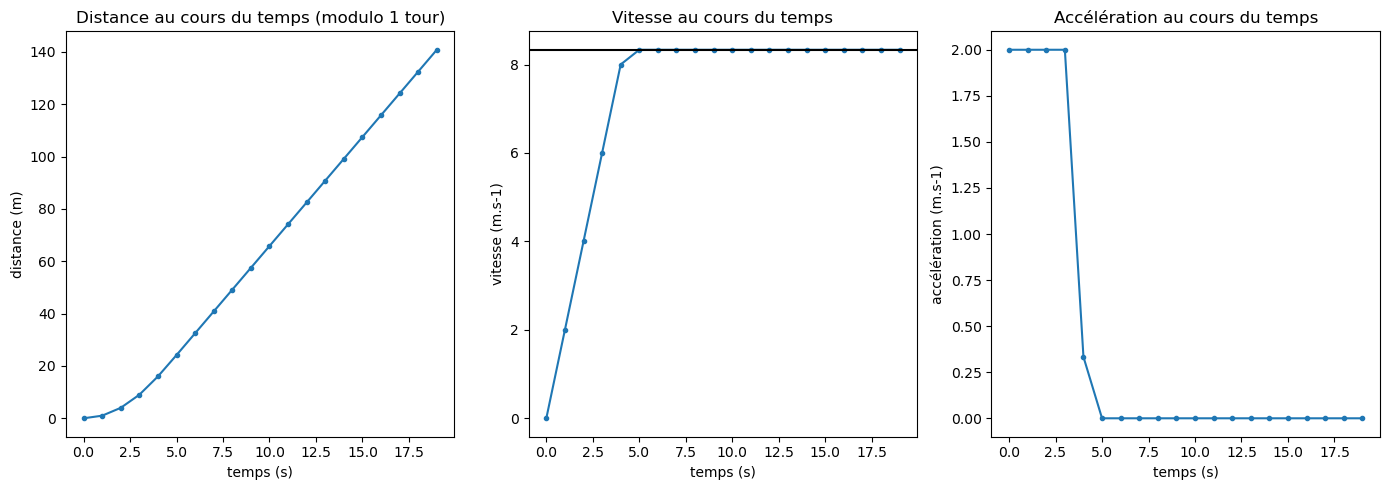

In [67]:
# Caractéristiques de la voiture
_accelMax = 2 #m.s-2
_accelMin = 0.2 #m.s-2
_breakMax = 10 #m.s-2
_breakMin = 1 #m.s-2

def getCarKinematics(l_t):
    '''Donne la position de la voiture à partir d'une liste d'instants (en secondes)'''
    retVal = np.empty((3, len(l_t)))
    
    # Conditions initiales
    retVal[0, 0] = 0
    retVal[1, 0] = 0
    
    # Cette fois on utilise une approche instant par instant pour que la voiture puisse réagir à la situation
    for i in range(len(l_t)) :
        delta_t = l_t[1] - l_t[0]
        
        # On intègre par la méthodes des rectangles à droite et des trapèzes
        if (i > 0) :
            retVal[1, i] = retVal[1, i-1] + retVal[2, i-1] * delta_t
            retVal[0, i] = retVal[0, i-1] + (retVal[1, i] + retVal[1, i-1]) * delta_t / 2
        
        # On calcule la réaction du conducteur à ces conditions
        if (retVal[1, i] < _maxSpeed) :
            # On calcule l'accéléretion voulue pour atteindre la vitesse cible en un intervalle de temps
            desiredAccel = min((_maxSpeed - retVal[1, i]) / delta_t, _accelMax)
            if (desiredAccel < _accelMin):
                desiredAccel = 0
            retVal[2, i] = desiredAccel
        elif (retVal[1, i-1] > _maxSpeed) :
            retVal[2, i] = -_breakMin
        else :
            retVal[2, i] = 0
    return retVal

# On affiche la nouvelle cinématique
np_times = np.arange(0, 20, 1) # en secondes
showCarKinematics(getCarKinematics(np_times))

On constate qu'avec cette approche on obtient un délai de réaction naturel qui corresponds à delta_t.

Je souhaite maintenant que la voiture ralentisse si un obstacle se présente, et s'arrête avant l'obstacle. Je place un obstacle fictif à la position 150 mètres. Je souhaite que la voiture commence à freiner à l'approche de cet obstacle et s'arrète juste avant. Il faut définir une distance à partir de laquelle commencer à freiner.

On cherche à trouver la force de freinage constante à appliquer pour arriver à une vitesse de 0 proche de l'obstacle. On pose les équations du mouvement uniformément accéléré :

$$
\left\{ \begin{array}{c}
v = v_0 + at \\
d = d_0 + v_0t + \frac{1}{2}at^2 \\
\end{array} \right.
$$

On souhaite une vitesse finale nulle à une distance qui corresponds à la distance avec l'obstacle. On peut donc définir $T$ comme le temps nécessaire à cette décélération. On obtient alors :

$$
\left\{ \begin{array}{c}
0 = v_0 + aT \\
d_{obstacle} = d_0 + v_0T + \frac{1}{2}aT^2 \\
\end{array} \right.
$$

$$
\Leftrightarrow \left\{ \begin{array}{cl}
T = -\frac{v_0}{a} \\
a = -1/2\frac{v_0^2}{d_{obstacle} - d_0} \\
\end{array} \right.
$$

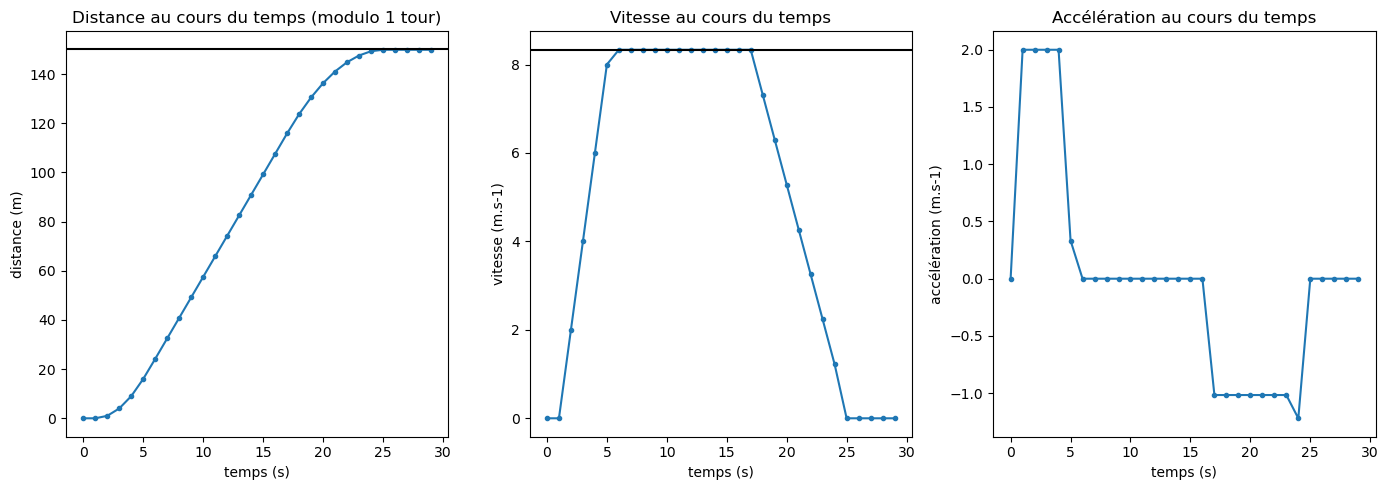

In [82]:
_obstaclePos = 150

def getBreakingForce(delta_t, relDis, speed) :
    '''Donne la force de freinage nécessaire en cas d'obstacle imminent'''
    if (speed * delta_t > relDis) :
        return speed / delta_t
    
    # On calcule le freinage voulu pour atteindre une vitesse de 0 à la distance d
    desiredBreaking = 1/2 * speed**2/relDis
    if (desiredBreaking < _breakMin):
        desiredBreaking = 0
    elif (desiredBreaking > _breakMax):
        desiredBreaking = _breakMax
    return desiredBreaking

def getAccelForce(delta_t, relDis, speed) :
    '''Donne l'accélération souhaitée pour atteindre la vitesse max'''
    if ((speed + _accelMin * delta_t) * delta_t > relDis) :
        return 0
    
    # On calcule l'accéléretion voulue pour atteindre la vitesse cible en un intervalle de temps
    desiredAccel = min((_maxSpeed - speed) / delta_t, _accelMax)
    if (desiredAccel < _accelMin):
        desiredAccel = 0
    return desiredAccel

def getCarKinematics(l_t):
    '''Donne la position de la voiture à partir d'une liste d'instants (en secondes)'''
    retVal = np.empty((3, len(l_t)))
    
    # Conditions initiales
    retVal[0, 0] = 0
    retVal[1, 0] = 0
    
    # Cette fois on utilise une approche instant par instant pour que la voiture puisse réagir à la situation
    for i in range(len(l_t)) :
        #print(f"t = {i}")
        delta_t = l_t[i] - l_t[i-1]
        
        if (i > 0) :
            retVal[1, i] = max(retVal[1, i-1] + retVal[2, i-1] * delta_t, 0)
            retVal[0, i] = retVal[0, i-1] + (retVal[1, i] + retVal[1, i-1]) * delta_t / 2
        
        # On récupère la force de freinage dues aux obstacles
        breakingForce = getBreakingForce(delta_t, _obstaclePos - retVal[0, i], retVal[1, i])
        if (breakingForce > 0) :
            # On freine à cause d'un obstacle
            retVal[2, i] = -breakingForce
        elif (retVal[1, i] < _maxSpeed) :
            # On calcule l'accéléretion voulue pour atteindre la vitesse cible en un intervalle de temps
            retVal[2, i] = getAccelForce(delta_t, _obstaclePos - retVal[0, i], retVal[1, i])
        elif (retVal[1, i-1] > _maxSpeed) :
            retVal[2, i] = -_breakMin
        else :
            retVal[2, i] = 0
        #print(f"\tp = {retVal[0, i]:.2f} v = {retVal[1, i]:.2f} accel = {retVal[2, i]:.2f}")
    return retVal

def showCarKinematics(np_carKinematics):
    # configuration de la grille de plots
    fig, axs = plt.subplots(1, 3, figsize=(14, 5)) 
    
    axs[0].plot(np_times, np_carKinematics[0, :], '.-')
    axs[0].set_title('Distance au cours du temps (modulo 1 tour)')
    axs[0].set_xlabel('temps (s)')
    axs[0].set_ylabel('distance (m)')
    axs[0].axhline(150, color='black')
    
    axs[1].plot(np_times, np_carKinematics[1, :], '.-')
    axs[1].set_title('Vitesse au cours du temps')
    axs[1].set_xlabel('temps (s)')
    axs[1].set_ylabel('vitesse (m.s-1)')
    axs[1].axhline(_maxSpeed, color='black')
    
    axs[2].plot(np_times, np_carKinematics[2, :], '.-')
    axs[2].set_title('Accélération au cours du temps')
    axs[2].set_xlabel('temps (s)')
    axs[2].set_ylabel('accélération (m.s-1)')
    
    plt.tight_layout(w_pad=1, h_pad=1)
    plt.show()

# On affiche la nouvelle cinématique
np_times = np.arange(0, 30, 1) # en secondes
showCarKinematics(getCarKinematics(np_times))

Observons maintenant le comportement de la voiture quand elle suit une autre voiture avec une vitesse inférieure à la vitesse maximale. Je modélise 2 voitures :
- Une voiture pilote avec une vitesse constante et qui pars de la position 50 mètres.
- Une voiture conduite par le conducteur simulé

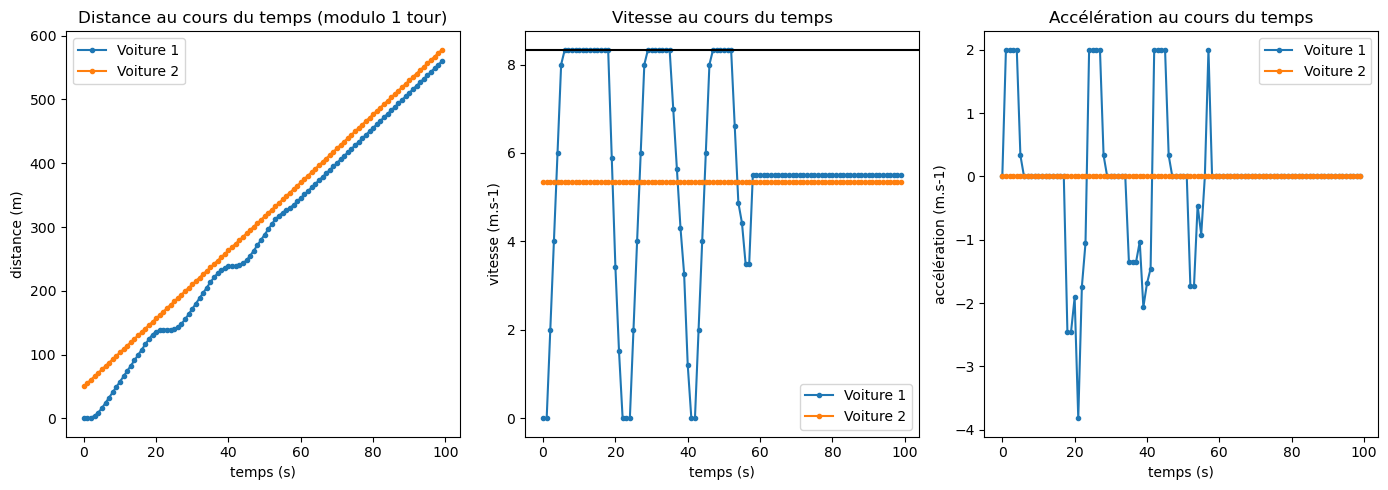

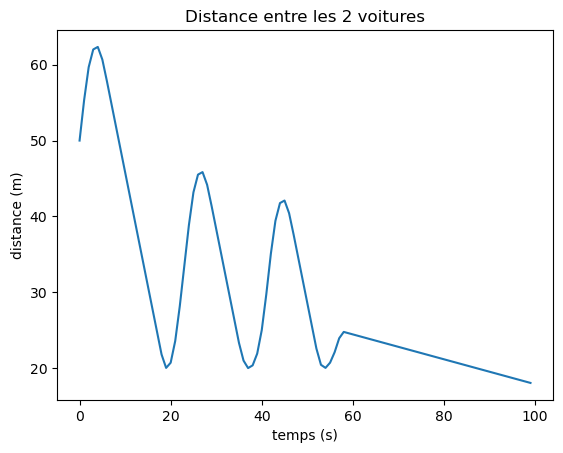

In [86]:
def getCarKinematics(l_t):
    '''Donne la position de la voiture à partir d'une liste d'instants (en secondes)'''
    retVal = np.empty((3, len(l_t)))
    pilotCar = np.empty((3, len(l_t)))
    
    # Conditions initiales
    retVal[0, 0] = 0
    retVal[1, 0] = 0
    pilotCar[0, 0] = 50
    pilotCar[1, :] = _maxSpeed - 3
    pilotCar[2, :] = 0
    
    # Cette fois on utilise une approche instant par instant pour que la voiture puisse réagir à la situation
    for i in range(len(l_t)) :
        #print(f"t = {i}")
        delta_t = l_t[i] - l_t[i-1]
        
        if (i > 0) :
            retVal[1, i] = max(retVal[1, i-1] + retVal[2, i-1] * delta_t, 0)
            retVal[0, i] = retVal[0, i-1] + (retVal[1, i] + retVal[1, i-1]) * delta_t / 2
            pilotCar[1, i] = max(pilotCar[1, i-1] + pilotCar[2, i-1] * delta_t, 0)
            pilotCar[0, i] = pilotCar[0, i-1] + (pilotCar[1, i] + pilotCar[1, i-1]) * delta_t / 2
        
        # On récupère la force de freinage dues aux obstacles
        breakingForce = getBreakingForce(delta_t, pilotCar[0, i] - retVal[0, i] - 20, pilotCar[1, i] - retVal[1, i])
        if (breakingForce > 0) :
            # On freine à cause d'un obstacle
            retVal[2, i] = -breakingForce
        elif (retVal[1, i] < _maxSpeed) :
            # On calcule l'accéléretion voulue pour atteindre la vitesse cible en un intervalle de temps
            retVal[2, i] = getAccelForce(delta_t, pilotCar[0, i] - retVal[0, i] - 20, retVal[1, i])
        elif (retVal[1, i-1] > _maxSpeed) :
            retVal[2, i] = -_breakMin
        else :
            retVal[2, i] = 0
        #print(f"\tp = {retVal[0, i]:.2f} v = {retVal[1, i]:.2f} accel = {retVal[2, i]:.2f}")
    return (retVal, pilotCar)

def showCarKinematics(np_carKinematics1, np_carKinematics2):
    # configuration de la grille de plots
    fig, axs = plt.subplots(1, 3, figsize=(14, 5)) 
    
    axs[0].plot(np_times, np_carKinematics1[0, :], '.-', label="Voiture 1")
    axs[0].plot(np_times, np_carKinematics2[0, :], '.-', label="Voiture 2")
    axs[0].set_title('Distance au cours du temps (modulo 1 tour)')
    axs[0].set_xlabel('temps (s)')
    axs[0].set_ylabel('distance (m)')
    axs[0].legend()
    
    axs[1].plot(np_times, np_carKinematics1[1, :], '.-', label="Voiture 1")
    axs[1].plot(np_times, np_carKinematics2[1, :], '.-', label="Voiture 2")
    axs[1].set_title('Vitesse au cours du temps')
    axs[1].set_xlabel('temps (s)')
    axs[1].set_ylabel('vitesse (m.s-1)')
    axs[1].axhline(_maxSpeed, color='black')
    axs[1].legend()
    
    axs[2].plot(np_times, np_carKinematics1[2, :], '.-', label="Voiture 1")
    axs[2].plot(np_times, np_carKinematics2[2, :], '.-', label="Voiture 2")
    axs[2].set_title('Accélération au cours du temps')
    axs[2].set_xlabel('temps (s)')
    axs[2].set_ylabel('accélération (m.s-1)')
    axs[2].legend()
    
    plt.tight_layout(w_pad=1, h_pad=1)
    plt.show()

# On affiche la nouvelle cinématique
np_times = np.arange(0, 100, 1) # en secondes
(np_carKinematics1, np_carKinematics2) = getCarKinematics(np_times)
showCarKinematics(np_carKinematics1, np_carKinematics2)

# On affiche la distance séparant les 2 voitures
plt.plot(np_times, np_carKinematics2[0, :] - np_carKinematics1[0, :])
plt.title("Distance entre les 2 voitures")
plt.xlabel('temps (s)')
plt.ylabel('distance (m)')
plt.show()

On peut constater que la voiture arrive avec une vitesse trop grande par rapport à la voiture pilote et doit ralentir. Ces oscillations diminuent avant de se stabiliser.